In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kclean/kpmg_cleaned.csv


This project is based on recommeding customer segments for the customer base of a company which manufactures spare parts for bicycles and motorbikes. Various datasets were made avalable in the form a Microsoft Excel workbook.

All the data was then merged together to make a single coherent dataset for the purposes of this project. 

This project involved preliminary cleaning of the dataset in Microsoft Excel.It involved removing missing values, duplciate values and correcting irregular data entries. Further, features deemed unneccesary for prediction were also discarded.

In [2]:
df=pd.read_csv("/kaggle/input/kclean/kpmg_cleaned.csv")

In [3]:
df.head()

,customer_id,gender,past3yr,Age,Age_Group,job_industry_category,wealth_segment,Unnamed: 7,owns_car,tenure,profitsum,productcount,State,Property_valuation
0,1,Female,93,69,60,Health,Mass Customer,NaN,Yes,11.0,3018.09,11.0,NSW,10.0
1,2,Male,81,42,40,Financial Services,Mass Customer,NaN,Yes,16.0,2226.26,3.0,NSW,10.0
2,3,Male,61,68,60,Property,Mass Customer,NaN,Yes,15.0,3362.81,8.0,NSW,10.0
3,4,Male,33,61,60,IT,Mass Customer,NaN,No,7.0,220.57,2.0,QLD,9.0
4,5,Female,56,45,40,NaN,Affluent Customer,NaN,Yes,8.0,2394.94,6.0,NSW,4.0


In [4]:
df1=df.copy()
df1=df1[['customer_id','gender','past3yr','Age','job_industry_category','wealth_segment','owns_car','tenure','profitsum','productcount','State','Property_valuation']]

In [5]:
df1.dropna(inplace=True)
df1=df1.replace('#VALUE!',np.NaN)
df1.dropna(inplace=True)
df1['Age']=df1['Age'].astype('int')
df1

,customer_id,gender,past3yr,Age,job_industry_category,wealth_segment,owns_car,tenure,profitsum,productcount,State,Property_valuation
0,1,Female,93,69,Health,Mass Customer,Yes,11.0,3018.09,11.0,NSW,10.0
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16.0,2226.26,3.0,NSW,10.0
2,3,Male,61,68,Property,Mass Customer,Yes,15.0,3362.81,8.0,NSW,10.0
3,4,Male,33,61,IT,Mass Customer,No,7.0,220.57,2.0,QLD,9.0
5,6,Male,35,56,Retail,High Net Worth,Yes,13.0,3946.55,5.0,VIC,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,Male,99,36,Manufacturing,Mass Customer,Yes,19.0,2045.84,4.0,NSW,9.0
3496,3497,Female,73,36,Manufacturing,Affluent Customer,Yes,18.0,1648.32,3.0,VIC,5.0
3497,3498,Female,28,27,Manufacturing,Mass Customer,No,5.0,3147.33,6.0,VIC,4.0
3498,3499,Male,29,43,Manufacturing,Mass Customer,Yes,7.0,4955.25,7.0,QLD,9.0


Scaled the data for the numerical features below.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
dfa=df1[['past3yr','Age','tenure','profitsum','productcount','Property_valuation']]
scaledfa = scaler.fit_transform(dfa)
scaledfa=pd.DataFrame(scaledfa)
scaledfa.columns=['past3yr','Age','tenure','profitsum','productcount','Property_valuation']
scaledfa

,past3yr,Age,tenure,profitsum,productcount,Property_valuation
0,0.939394,0.690141,0.476190,0.258643,0.769231,0.818182
1,0.818182,0.309859,0.714286,0.190785,0.153846,0.818182
2,0.616162,0.676056,0.666667,0.288184,0.538462,0.818182
3,0.333333,0.577465,0.285714,0.018902,0.076923,0.727273
4,0.353535,0.507042,0.571429,0.338210,0.307692,0.727273
...,...,...,...,...,...,...
2856,1.000000,0.225352,0.857143,0.175323,0.230769,0.727273
2857,0.737374,0.225352,0.809524,0.141257,0.153846,0.363636
2858,0.282828,0.098592,0.190476,0.269718,0.384615,0.272727
2859,0.292929,0.323944,0.285714,0.424653,0.461538,0.727273


We apply one hot encoding for the categorical features and merge together the scaled features and encoded features.

In [7]:
x=pd.get_dummies(df1[['gender','job_industry_category','wealth_segment','owns_car','State']])
x.index=scaledfa.index
df_final=pd.concat([scaledfa,x.set_axis(scaledfa.index)],axis=1)
df_final

,past3yr,Age,tenure,profitsum,productcount,Property_valuation,gender_Female,gender_Male,job_industry_category_Argiculture,job_industry_category_Entertainment,...,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,State_NSW,State_QLD,State_VIC
0,0.939394,0.690141,0.476190,0.258643,0.769231,0.818182,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0.818182,0.309859,0.714286,0.190785,0.153846,0.818182,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0.616162,0.676056,0.666667,0.288184,0.538462,0.818182,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.333333,0.577465,0.285714,0.018902,0.076923,0.727273,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
4,0.353535,0.507042,0.571429,0.338210,0.307692,0.727273,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,1.000000,0.225352,0.857143,0.175323,0.230769,0.727273,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
2857,0.737374,0.225352,0.809524,0.141257,0.153846,0.363636,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2858,0.282828,0.098592,0.190476,0.269718,0.384615,0.272727,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2859,0.292929,0.323944,0.285714,0.424653,0.461538,0.727273,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_final)
pca.explained_variance_ratio_

array([1.50344215e-01, 1.47572707e-01, 1.14444617e-01, 1.10691612e-01,
       7.62040603e-02, 7.26032340e-02, 6.83034866e-02, 5.92314019e-02,
       3.85339027e-02, 2.72404602e-02, 2.50188351e-02, 2.36479779e-02,
       1.66445245e-02, 1.58059651e-02, 1.40910536e-02, 1.27982443e-02,
       1.08689720e-02, 7.03515629e-03, 6.62878036e-03, 2.29079526e-03,
       2.93144781e-32, 1.30944809e-32, 5.73435975e-33, 2.57588927e-33,
       1.06231566e-33])

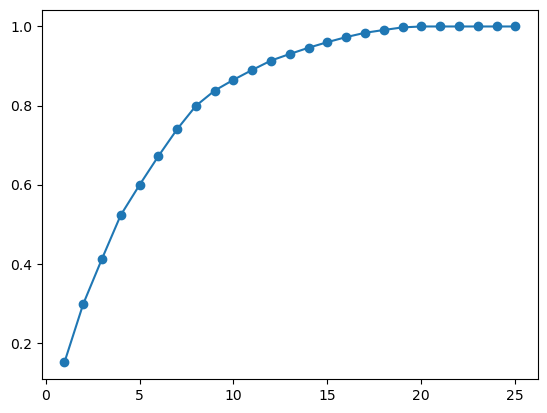

In [9]:
plt.plot(range(1,26),pca.explained_variance_ratio_.cumsum(),marker='o')

In [10]:
pca=PCA(n_components=8)
pca.fit(df_final)
scores_pca=pca.transform(df_final)

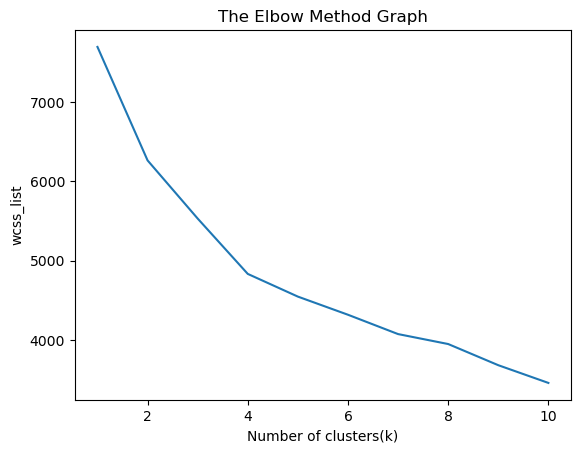

In [11]:
wcss_list= []   #wcss method is used to determine the optimal number of clusters that can be assumed.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(scores_pca)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [12]:
model = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= model.fit_predict(scores_pca)  
y_predict

array([3, 2, 2, ..., 1, 2, 1], dtype=int32)

In [13]:
df1['cluster_label']=y_predict
df1

,customer_id,gender,past3yr,Age,job_industry_category,wealth_segment,owns_car,tenure,profitsum,productcount,State,Property_valuation,cluster_label
0,1,Female,93,69,Health,Mass Customer,Yes,11.0,3018.09,11.0,NSW,10.0,3
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16.0,2226.26,3.0,NSW,10.0,2
2,3,Male,61,68,Property,Mass Customer,Yes,15.0,3362.81,8.0,NSW,10.0,2
3,4,Male,33,61,IT,Mass Customer,No,7.0,220.57,2.0,QLD,9.0,0
5,6,Male,35,56,Retail,High Net Worth,Yes,13.0,3946.55,5.0,VIC,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3496,Male,99,36,Manufacturing,Mass Customer,Yes,19.0,2045.84,4.0,NSW,9.0,2
3496,3497,Female,73,36,Manufacturing,Affluent Customer,Yes,18.0,1648.32,3.0,VIC,5.0,3
3497,3498,Female,28,27,Manufacturing,Mass Customer,No,5.0,3147.33,6.0,VIC,4.0,1
3498,3499,Male,29,43,Manufacturing,Mass Customer,Yes,7.0,4955.25,7.0,QLD,9.0,2


In [14]:
df1.tail()

,customer_id,gender,past3yr,Age,job_industry_category,wealth_segment,owns_car,tenure,profitsum,productcount,State,Property_valuation,cluster_label
3495,3496,Male,99,36,Manufacturing,Mass Customer,Yes,19.0,2045.84,4.0,NSW,9.0,2
3496,3497,Female,73,36,Manufacturing,Affluent Customer,Yes,18.0,1648.32,3.0,VIC,5.0,3
3497,3498,Female,28,27,Manufacturing,Mass Customer,No,5.0,3147.33,6.0,VIC,4.0,1
3498,3499,Male,29,43,Manufacturing,Mass Customer,Yes,7.0,4955.25,7.0,QLD,9.0,2
3499,3500,Female,71,55,Entertainment,Affluent Customer,No,17.0,1785.86,6.0,NSW,10.0,1


In [15]:
%cd /kaggle/working
df1.to_csv('/kaggle/working/kpmg_cleaned_clustered_fin.csv',index=False)

/kaggle/working


In [16]:
df1.corr()

,customer_id,past3yr,Age,tenure,profitsum,productcount,Property_valuation,cluster_label
customer_id,1.000000,-0.008526,-0.007873,-0.019848,-0.008700,-0.037417,-0.015217,0.034438
past3yr,-0.008526,1.000000,-0.042275,-0.018955,0.023035,-0.002620,0.007089,-0.014670
Age,-0.007873,-0.042275,1.000000,0.442975,0.000974,0.002460,0.021798,0.008694
tenure,-0.019848,-0.018955,0.442975,1.000000,0.027440,0.004054,-0.012563,0.000082
profitsum,-0.008700,0.023035,0.000974,0.027440,1.000000,0.712047,-0.024802,-0.002252
productcount,-0.037417,-0.002620,0.002460,0.004054,0.712047,1.000000,-0.006710,-0.027226
Property_valuation,-0.015217,0.007089,0.021798,-0.012563,-0.024802,-0.006710,1.000000,0.038445
cluster_label,0.034438,-0.014670,0.008694,0.000082,-0.002252,-0.027226,0.038445,1.000000


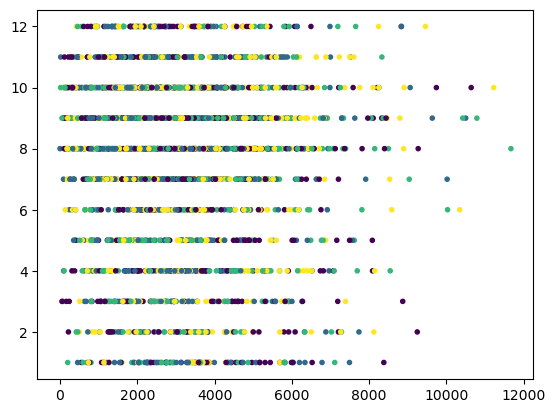

In [17]:
plt.scatter(df1.profitsum,df1.Property_valuation,c=df1.cluster_label,marker='.')

The above visualization is done for the clusters based on two features which show most correlation with the predicted cluster labels. However, the clusters appear incoherent and it suggests that the selected features are not the predictive features. Therefore, we now perform Principal Component Analysis.

In [18]:
pcomp_df=pd.DataFrame(scores_pca)
pcomp_df.columns=['c1','c2','c3','c4','c5','c6','c7','c8']
pcomp_df['labels']=y_predict
pcomp_df

,c1,c2,c3,c4,c5,c6,c7,c8,labels
0,-0.973063,-0.100923,-0.360674,-0.791176,-0.081296,-0.204147,-0.125977,0.781510,3
1,-0.041230,0.948346,-0.377279,-0.863837,-0.297609,0.397003,-0.415558,-0.450475,2
2,-0.027345,0.922082,-0.381325,-0.880020,-0.049842,-0.109060,0.019597,0.083116,2
3,1.056198,-0.032894,0.649955,-0.420326,-0.112395,0.507411,0.468706,0.214544,0
4,0.007565,1.055064,0.466567,0.701424,-0.591746,-0.738374,-0.150422,-0.029759,2
...,...,...,...,...,...,...,...,...,...
2856,-0.013158,0.897246,-0.316583,-0.862130,0.426921,-0.403693,0.492181,-0.387284,2
2857,-0.935319,0.040919,0.627493,0.788039,1.068701,-0.479634,-0.180294,-0.289201,3
2858,0.101054,-1.088622,0.909325,-0.219662,0.415017,-0.698018,0.042343,-0.471447,1
2859,0.038583,0.908639,0.775045,-0.525843,0.350716,0.157583,0.983696,-0.212502,2


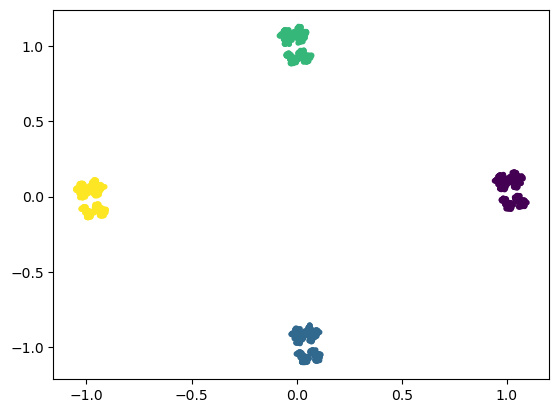

In [19]:
plt.scatter(pcomp_df.c1,pcomp_df.c2,c=pcomp_df.labels,marker='.')

The above visualization is done after perfoming PCA on the dataset